<a href="https://colab.research.google.com/github/Reubenpt123/DAV/blob/main/Neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils
#from imblearn.base import BaseSampler
#from imblearn.over_sampling import (SMOTE, RandomOverSampler)
#import imblearn
#from imblearn.over_sampling import SMOTE

In [8]:
cd d:\My Drive\Colab Notebooks\DAV Assessment\cefas_smartBuoy

d:\My Drive\Colab Notebooks\DAV Assessment\cefas_smartBuoy


We're also missing a lot of Kd values, so we'll train a model here with Kd and then again elsewhere without Kd and compare their performances.

In [15]:
df = pd.read_csv('clean_ext_data.csv', parse_dates = ['dateTime'])
df = df.set_index('dateTime')
df = df.dropna()

phase_0 = df[df['phase'] == 0]
X = phase_0.drop(['fluors', 'phase'], axis = 1)
y = phase_0['fluors']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)

,sal,ftu,fluors,surf_temp,direct_solar,phase
dateTime,,,,,,
2002-08-28 14:00:00,34.66125,6.0425,0.6500,18.728000,2.048638e+06,0
2002-08-28 15:00:00,34.61900,4.2225,0.8100,18.735000,1.785222e+06,0
2002-08-28 16:00:00,34.62100,2.9675,0.8250,18.772000,1.377425e+06,0
2002-08-28 17:00:00,34.68925,3.1400,0.9575,18.818000,8.836671e+05,0
2002-08-28 18:00:00,34.79275,4.8675,0.9175,18.828000,3.774992e+05,0
...,...,...,...,...,...,...
2013-06-05 20:00:00,34.66250,2.0200,8.1000,10.762999,1.174950e+05,2
2013-06-05 21:00:00,34.60400,1.9400,12.0200,10.703999,0.000000e+00,2
2013-06-05 22:00:00,34.58050,2.0350,11.9750,10.674999,0.000000e+00,2


In [ ]:
model = Sequential()
model.add(Dense(units = 1000, activation = "relu", input_shape = (5, )))
model.add(Dropout(0.1))
model.add(Dense(units = 500, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(units = 500, activation = "relu"))
model.add(Dense(units = 100, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "relu"))
model.summary()
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ['mean_squared_error'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1000)              6000      
                                                                 
 dropout_3 (Dropout)         (None, 1000)              0         
                                                                 
 dense_6 (Dense)             (None, 500)               500500    
                                                                 
 dropout_4 (Dropout)         (None, 500)               0         
                                                                 
 dense_7 (Dense)             (None, 500)               250500    
                                                                 
 dense_8 (Dense)             (None, 100)               50100     
                                                                 
 dropout_5 (Dropout)         (None, 100)              

In [ ]:
no_epochs = 10
history = model.fit(X_train, y_train, batch_size = 30, epochs = no_epochs, verbose = 1, validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 1)

Epoch 1/10
448/448 [==============================] - 6s 13ms/step - loss: 1.6553 - mean_squared_error: 1.6553 - val_loss: 1.6530 - val_mean_squared_error: 1.6530
Epoch 2/10
448/448 [==============================] - 7s 16ms/step - loss: 1.3133 - mean_squared_error: 1.3133 - val_loss: 1.0833 - val_mean_squared_error: 1.0833
Epoch 3/10
448/448 [==============================] - 6s 13ms/step - loss: 1.2549 - mean_squared_error: 1.2549 - val_loss: 1.0681 - val_mean_squared_error: 1.0681
Epoch 4/10
448/448 [==============================] - 5s 11ms/step - loss: 1.1983 - mean_squared_error: 1.1983 - val_loss: 1.0403 - val_mean_squared_error: 1.0403
Epoch 5/10
448/448 [==============================] - 5s 11ms/step - loss: 1.2046 - mean_squared_error: 1.2046 - val_loss: 0.9704 - val_mean_squared_error: 0.9704
Epoch 6/10
448/448 [==============================] - 5s 10ms/step - loss: 1.1522 - mean_squared_error: 1.1522 - val_loss: 1.0341 - val_mean_squared_error: 1.0341
Epoch 7/10
448/448 [==

In [ ]:
pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train)))
pred_test = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_test))) 

420/420 [==============================] - 1s 2ms/step
0.9577699490243253
180/180 [==============================] - 0s 2ms/step
0.9570397126288323


In [ ]:
model.save('model.h5')

In [ ]:
#model = keras.models.load_model('model.h5')
pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train)))
pred_test = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_test)))
y_pred = model.predict(X)
print(np.sqrt(mean_squared_error(y, y_pred)))

420/420 [==============================] - 1s 2ms/step
0.9577699490243253
180/180 [==============================] - 0s 2ms/step
0.9570397126288323
599/599 [==============================] - 1s 1ms/step
0.9575509363867484


C:\Users\709583\AppData\Local\Temp\ipykernel_1732\645716267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phase_0['y_pred'] = y_pred
C:\Users\709583\AppData\Local\Temp\ipykernel_1732\645716267.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


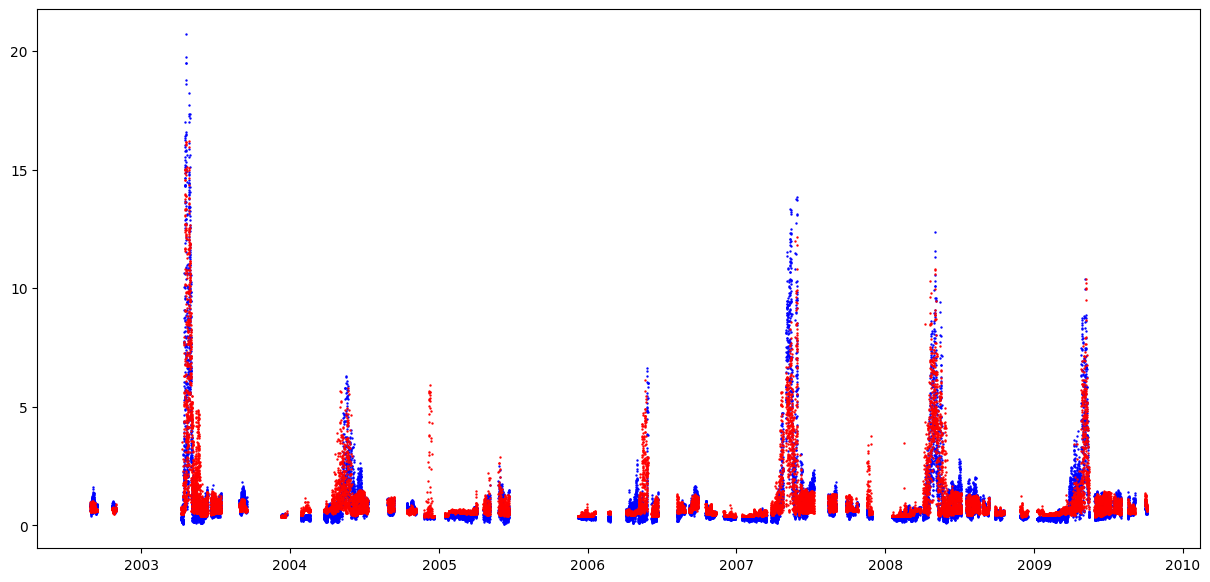

In [ ]:
phase_0['y_pred'] = y_pred
fig, ax = plt.subplots(figsize = (15, 7))
ax.scatter(phase_0.index, phase_0['fluors'], s = 0.5, color = 'blue')
ax.scatter(phase_0.index, phase_0['y_pred'], s = 0.5, color = 'red')
fig.savefig('predictions.png')
fig.show()

C:\Users\709583\AppData\Local\Temp\ipykernel_1732\978024357.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


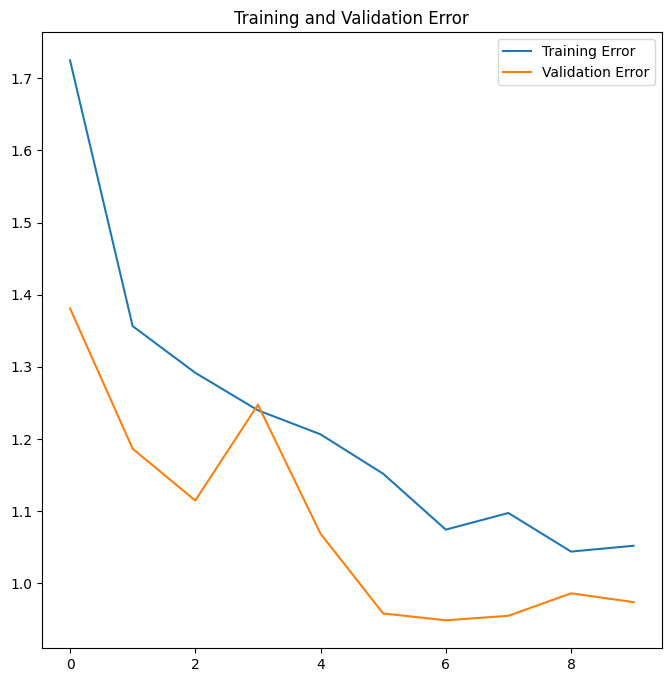

In [ ]:
epochs_range = range(no_epochs)
train_err = history.history['mean_squared_error']
validation_err = history.history['val_mean_squared_error']
train_loss = history.history['loss']
validation_loss = history.history['val_loss']

fig, ax = plt.subplots(figsize = (8,8))
ax.plot(epochs_range, train_err, label = 'Training Error')
ax.plot(epochs_range, validation_err, label = 'Validation Error')
ax.legend(loc = 'upper right')
ax.set_title('Training and Validation Error')
fig.show()

In [ ]:
phase_1 = df[df['phase'] > 0]
X_1 = phase_1.drop(['fluors', 'phase'], axis = 1)
scaler = StandardScaler()
X_1 = scaler.fit_transform(X_1)
y_1_pred = model.predict(X_1)

613/613 [==============================] - 1s 2ms/step


C:\Users\709583\AppData\Local\Temp\ipykernel_1732\2032055869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phase_1['y_1_pred'] = y_1_pred
C:\Users\709583\AppData\Local\Temp\ipykernel_1732\2032055869.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


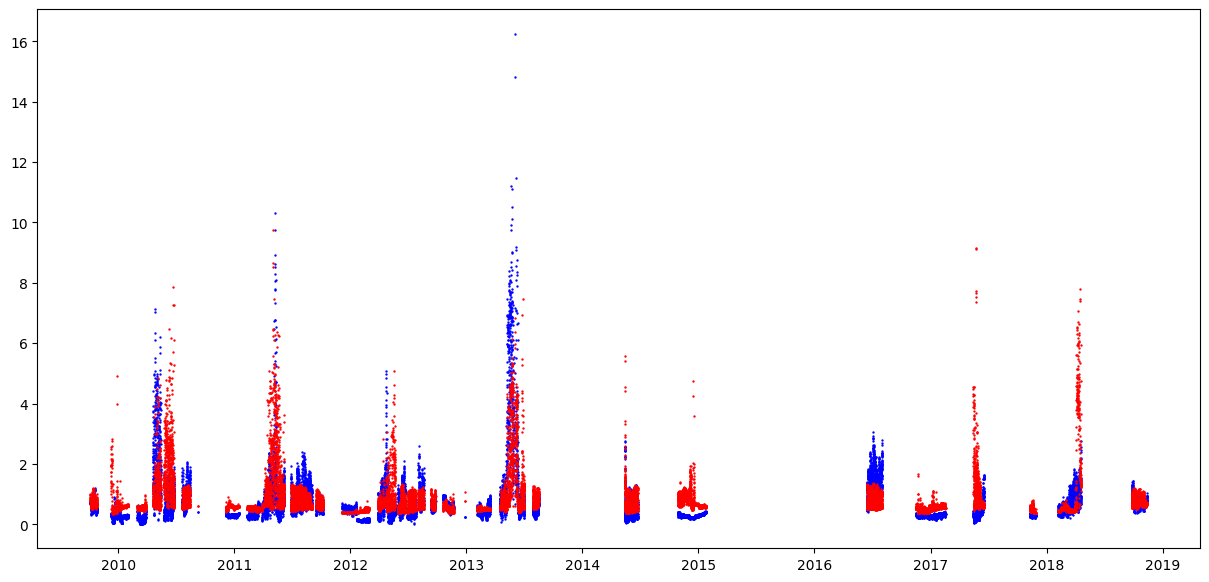

In [ ]:
phase_1['y_1_pred'] = y_1_pred
fig, ax = plt.subplots(figsize = (15, 7))
ax.scatter(phase_1.index, phase_1['fluors'], s = 0.5, color = 'blue')
ax.scatter(phase_1.index, phase_1['y_1_pred'], s = 0.5, color = 'red')
fig.savefig('future_predictions.png')
fig.show()